In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
recent_date

('2017-08-23',)

For reference:
Measurements has the following data columns: "station", "date", "prcp", "tobs"
Station: "station", "name", "latitude", "longitude", "elevation"

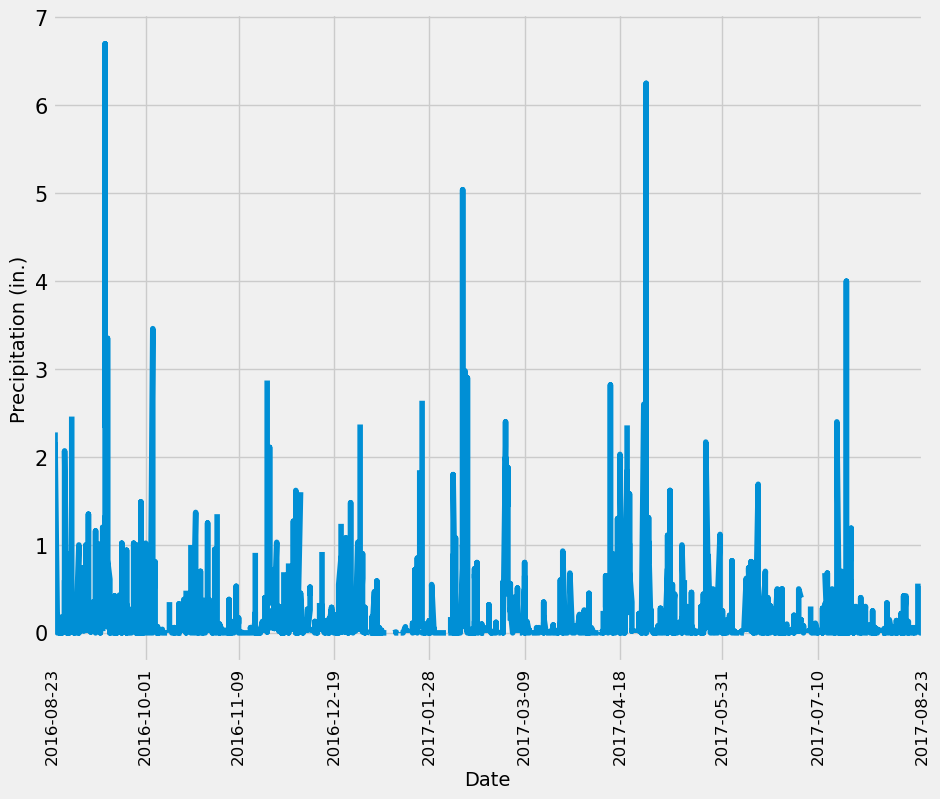

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database,...
# Calculate the date one year from the last date in data set.
year_prior = (dt.date(2017, 8, 23) - dt.timedelta(days=365)).strftime('%Y-%m-%d')
year_prior

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= year_prior).all()
prcp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_DF = pd.DataFrame(prcp_data, columns = ["date","precipitation"])
prcp_DF.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_DF.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,8))
plt.plot(prcp_DF.index, prcp_DF['precipitation'])

plt.xlabel("Date", fontsize=14)
plt.ylabel("Precipitation (in.)", fontsize=14)

xloc = [
    "2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28",
    "2017-03-09", "2017-04-18","2017-05-31", "2017-07-10", "2017-08-23"
]

plt.xticks(xloc, rotation='vertical', fontsize=12)
plt.yticks(size=15)
plt.xlim(0, 365)

plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_DF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Station.station).count()
station_total

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Query the busiest station
session.query(Station.station, Station.name).\
    filter(Station.station == 'USC00519281').all()


[('USC00519281', 'WAIHEE 837.5, HI US')]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(Measurements.tobs), func.min(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()



[(85.0, 54.0, 71.66378066378067)]

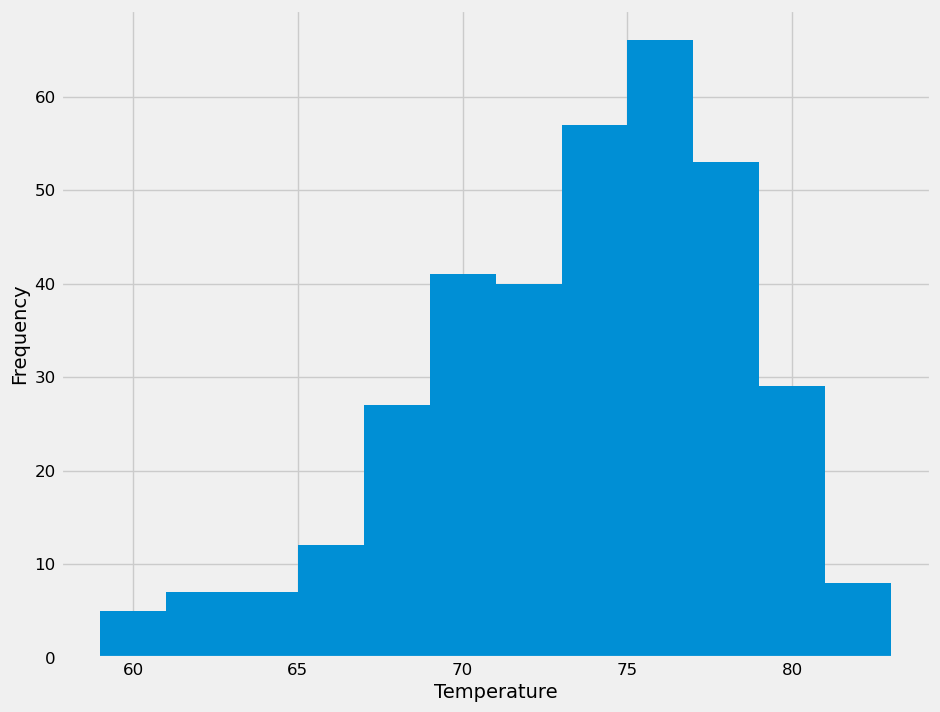

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
Waihee_data = session.query(Measurements.tobs).\
    filter(Measurements.station == 'USC00519281').\
    filter(Measurements.date >= year_prior).all()
Waihee_DF = pd.DataFrame(Waihee_data, columns=['tobs'])

# and plot the results as a histogram
plt.figure(figsize=(10,8))
plt.hist(np.ravel(Waihee_DF), bins=12)

plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yticks(size=12)
plt.xticks(size=12)

plt.show()

# Close session

In [17]:
# Close Session
session.close()